In [1]:
import os
import cv2
import random
import math
from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-11-30 21:22:54.470239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 21:22:54.636478: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sakib/.virtualenvs/lpr/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-30 21:22:54.636554: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-30 21:22:55.368721: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7

In [2]:
provinces = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", 
"浙", "京", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "警", "学", "O"]
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W','X', 'Y', 'Z', 'O']
ads = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X','Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'O']

In [3]:
seed = 458
random.seed(seed)
directory = './CCPD2019/ccpd_base'
image_paths = list(paths.list_images(directory))
image_paths = random.sample(image_paths, 2000)

In [4]:
license_images = []
license_labels = []
license_plate = []
location = []
tilt= []
plate_coord= []
i=0
count = 0
TVT_SPLIT_SEED = 31528476

In [5]:
for f in image_paths: 
    img = cv2.imread(f)
    lbl = f.split('/')[-1].rsplit('.', 1)[0].split('-')[2]
    license = [int(i) for i in f.split('/')[-1].rsplit('.', 1)[0].split('-')[-3].split('_')]
    license_labels.append(license)
    plate_coord.append(f.split('/')[-1].rsplit('.', 1)[0].split('-')[3]) 
    iname = f.rsplit('/', 1)[-1].rsplit('.', 1)[0].split('-')
    [leftUp, rightDown] = [[int(eel) for eel in el.split('&')] for el in iname[2].split('_')]
    ori_w, ori_h = [float(int(el)) for el in [img.shape[1], img.shape[0]]]
    new_labels = [(leftUp[0] + rightDown[0]) / (2 * ori_w), (leftUp[1] + rightDown[1]) / (2 * ori_h),(rightDown[0] - leftUp[0]) / ori_w, (rightDown[1] - leftUp[1]) / ori_h]
    crop_img = img[leftUp[1]:rightDown[1], leftUp[0]:rightDown[0]]
    license_plate.append([provinces[license[0]], alphabets[license[1]], ads[license[2]], ads[license[3]], ads[license[4]], ads[license[5]], ads[license[6]]])
    width = 120 
    height = 24
    dim = (width, height)
    tilt.append(f.split('/')[-1].rsplit('.', 1)[0].split('-')[1])
    
    split= plate_coord[i].split('_')
    i+= 1
    x= (split[0].split('&'))
    y= (split[1].split('&'))
    z= (split[2].split('&'))
    w= (split[3].split('&'))
    coordinates= [int(x[0]), int(x[1]),int(y[0]),int(y[1]),int(z[0]),int(z[1]),int(w[0]),int(w[1])]
    location.append(coordinates)
    p1 = np.float32([[coordinates[4], coordinates[5]],
                     [coordinates[6], coordinates[7]],
                     [coordinates[2], coordinates[3]], 
                     [coordinates[0], coordinates[1]]])
    p2 = np.float32([[0, 0],[img.shape[1],0],[0,img.shape[0]],[img.shape[1],img.shape[0]]])
    M = cv2.getPerspectiveTransform(p1, p2)
    outimg = cv2.warpPerspective(img, M, img.shape[1::-1])
    resized = cv2.resize(outimg, dim, interpolation = cv2.INTER_AREA)

    count+=1
    license_images.append(resized)

In [6]:
license_images = np.array(license_images)
print(license_images.shape)

(2000, 24, 120, 3)


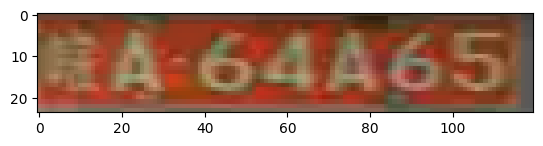

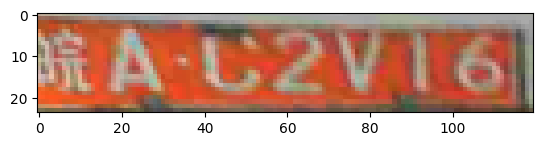

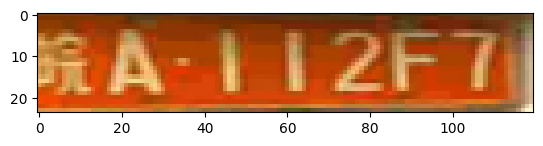

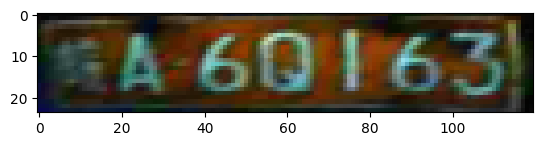

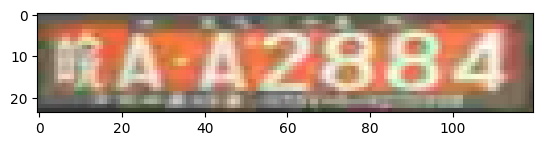

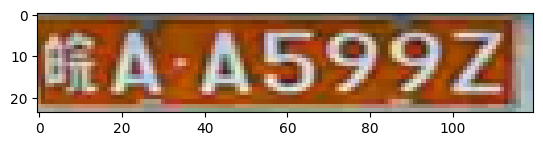

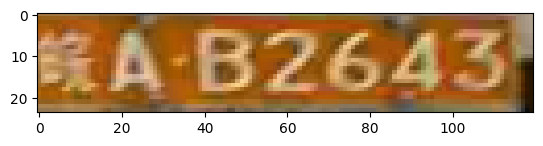

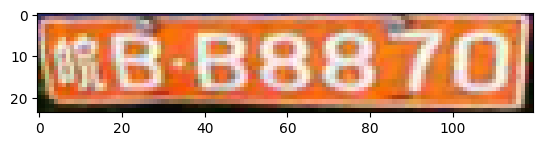

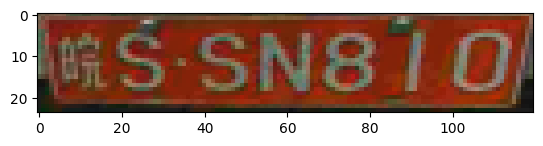

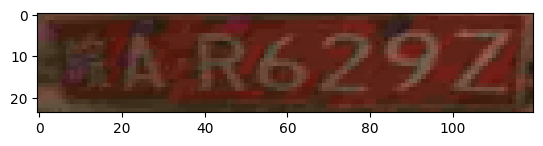

In [7]:
for i in range(len(license_images)):
    if i<10:
        plt.imshow(license_images[i])
        plt.show()

In [8]:
x_dim = [0, 18, 18, 32, 38, 53, 55, 69, 70, 83, 83, 98, 100, 115]
y_dim = [2, 20]
char_images = []
char_labels = []

for j in range(len(license_images)):
    for i in range(7):
        char = license_images[j][y_dim[0]:y_dim[1], x_dim[i*2]:x_dim[i*2+1]]
        char = cv2.resize(char, (20, 20))
        char_gray = cv2.cvtColor(char,cv2.COLOR_BGR2GRAY)
        char_images.append(char_gray)
        char_label = license_plate[j][i]
        char_labels.append(char_label)
char_images= np.array(char_images)
char_images = char_images[:,:,:,None]

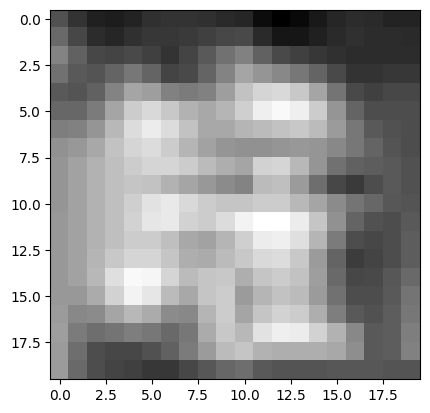

皖


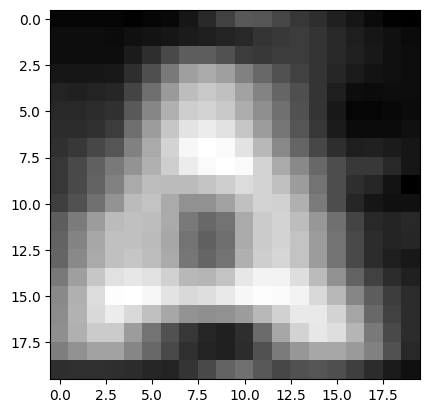

A


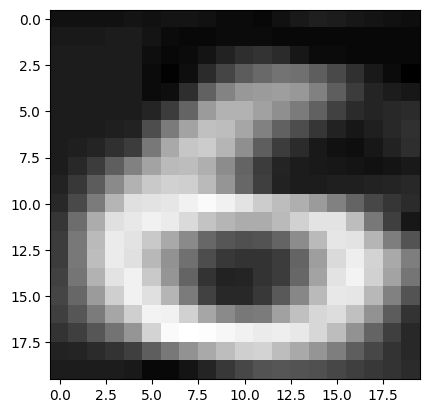

6


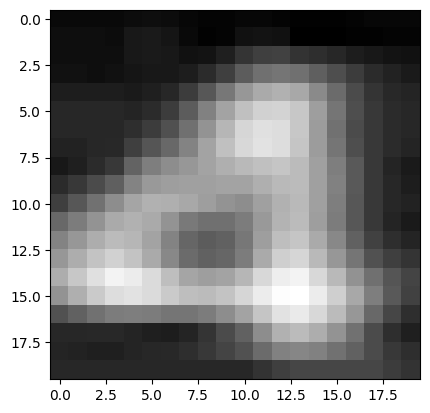

4


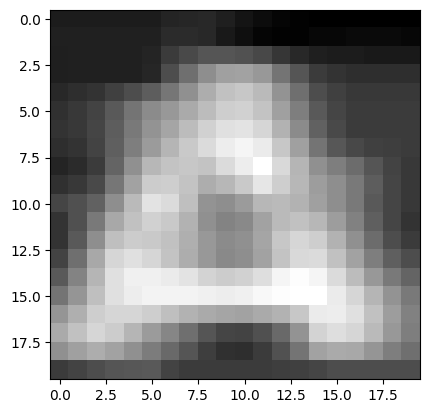

A


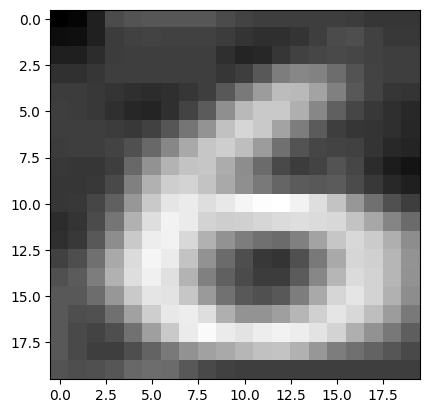

6


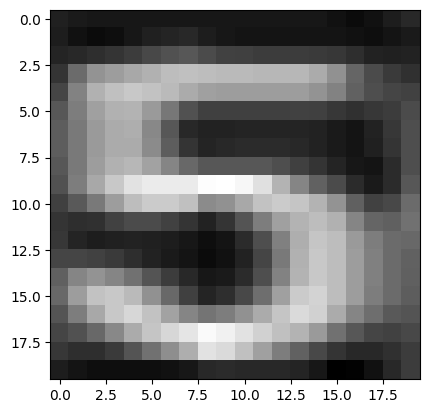

5


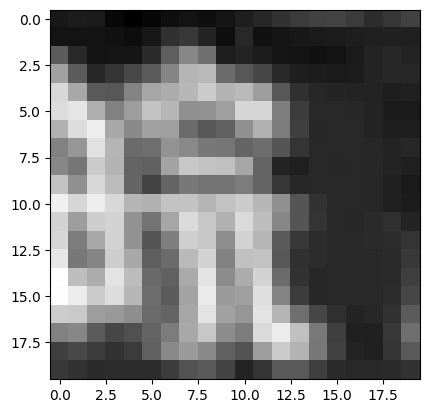

皖


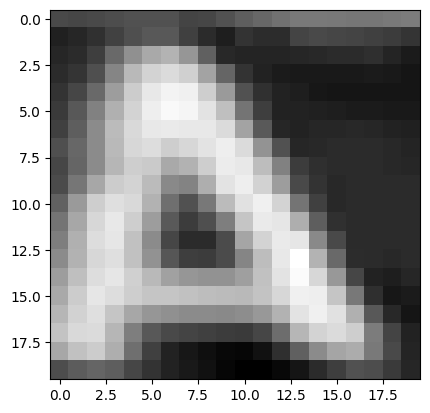

A


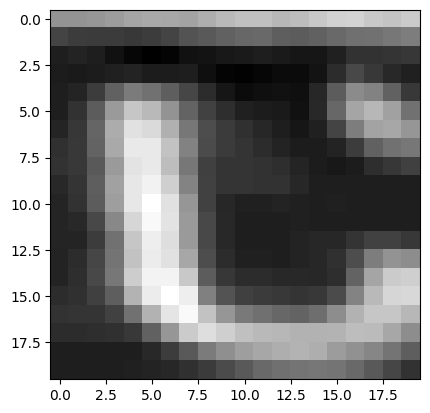

C


In [9]:
for i in range(10):
    plt.imshow(np.reshape(char_images[i], (20,20)), cmap='gray')
    plt.show()
    print(char_labels[i])

In [10]:
license_images_tv, license_images_test, license_plate_tv, license_plate_test = train_test_split(char_images,char_labels, test_size=0.2, shuffle = False)

In [11]:
def flatten(it):
    return (value for sub_it in it for value in sub_it)

In [12]:
characters = list(flatten(license_plate_tv))
lb = LabelBinarizer()
labels_one_hot_tv = lb.fit_transform(characters)
n_classes = len(lb.classes_)
license_plate_one_hot_tv= np.reshape(labels_one_hot_tv,(len(license_plate_tv), 1, n_classes))

In [13]:
license_images_train, license_images_vali, license_plate_one_hot_train, license_plate_one_hot_vali = train_test_split(license_images_tv, license_plate_one_hot_tv, test_size=0.25, shuffle = False)
print(license_images_train.shape)
print('n_classes', n_classes)

(8400, 20, 20, 1)
n_classes 50


In [14]:
def multi_acc(actual_one_hot, pred_dist):
    actual_classes = tf.argmax(actual_one_hot, axis=-1)
    pred_classes = tf.argmax(pred_dist, axis=-1)
    pred_correct = tf.reduce_all(tf.equal(actual_classes, pred_classes), axis=-1)
    pred_correct = tf.cast(pred_correct, dtype=pred_dist.dtype)
    return tf.reduce_mean(pred_correct)

In [15]:
def build_model(n_classes):
    model = Sequential()
 
    model.add(layers.Conv2D(10, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(40, (5, 5), padding="same", input_shape=(20, 20, 10), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(100, (5, 5), padding="same", input_shape=(10, 10, 40), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(200, (3, 3), strides=(2, 2), padding="valid", input_shape=(5, 5, 100), activation="relu"))
    model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(n_classes, (1, 1), padding="valid", input_shape=(1, 1, 200), activation=None))
    model.add(layers.BatchNormalization())
    
    model.add(tf.keras.layers.Reshape((1, n_classes), input_shape=(1,1, n_classes)))
    model.add(layers.Softmax())

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[multi_acc])
    
    return model

In [16]:
license_transformer = ImageDataGenerator()

In [17]:
def train_model(model, batch_size=64, n_epochs=10, seed=42):
    iter_train= license_transformer.flow(license_images_train, license_plate_one_hot_train, batch_size=batch_size, seed= seed)
    iter_vali= license_transformer.flow(license_images_vali, license_plate_one_hot_vali, batch_size=batch_size, seed= seed)
    steps_train = len(license_images_train)/batch_size
    steps_vali= len(license_images_vali)/batch_size
    
    return model.fit_generator(
        generator=iter_train,
        steps_per_epoch=steps_train,
        epochs=n_epochs,
        validation_data=iter_vali,
        validation_steps=steps_vali,
        verbose=1
    )

In [ ]:
model_basic = build_model(n_classes)
history_basic = train_model(model_basic, n_epochs=100)

Epoch 1/100


2022-11-30 21:23:19.218769: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sakib/.virtualenvs/lpr/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-30 21:23:19.218833: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-30 21:23:19.218888: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Sakib-Laptop): /proc/driver/nvidia/version does not exist
2022-11-30 21:23:19.219217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropr

131/131 [==============================] - 11s 67ms/step - loss: 0.0378 - multi_acc: 0.8723 - val_loss: 0.0514 - val_multi_acc: 0.9734
Epoch 2/100
131/131 [==============================] - 8s 57ms/step - loss: 0.0207 - multi_acc: 0.9826 - val_loss: 0.0190 - val_multi_acc: 0.9922
Epoch 3/100
131/131 [==============================] - 8s 63ms/step - loss: 0.0150 - multi_acc: 0.9917 - val_loss: 0.0102 - val_multi_acc: 0.9917
Epoch 4/100
131/131 [==============================] - 7s 56ms/step - loss: 0.0118 - multi_acc: 0.9941 - val_loss: 0.0066 - val_multi_acc: 0.9957
Epoch 5/100
131/131 [==============================] - 7s 55ms/step - loss: 0.0095 - multi_acc: 0.9950 - val_loss: 0.0040 - val_multi_acc: 0.9961
Epoch 6/100
131/131 [==============================] - 7s 57ms/step - loss: 0.0078 - multi_acc: 0.9964 - val_loss: 0.0039 - val_multi_acc: 0.9979
Epoch 7/100
131/131 [==============================] - 8s 59ms/step - loss: 0.0063 - multi_acc: 0.9964 - val_loss: 0.0031 - val_multi_a

131/131 [==============================] - 7s 57ms/step - loss: 1.9360e-04 - multi_acc: 0.9998 - val_loss: 4.2451e-04 - val_multi_acc: 0.9964
Epoch 56/100
131/131 [==============================] - 7s 55ms/step - loss: 1.6452e-04 - multi_acc: 0.9999 - val_loss: 3.1928e-04 - val_multi_acc: 0.9961
Epoch 57/100
131/131 [==============================] - 7s 55ms/step - loss: 1.2985e-04 - multi_acc: 1.0000 - val_loss: 5.0543e-04 - val_multi_acc: 0.9963
Epoch 58/100
131/131 [==============================] - 8s 59ms/step - loss: 1.9118e-04 - multi_acc: 1.0000 - val_loss: 3.6226e-04 - val_multi_acc: 0.9964
Epoch 59/100
131/131 [==============================] - 9s 67ms/step - loss: 3.6557e-04 - multi_acc: 0.9983 - val_loss: 3.9974e-04 - val_multi_acc: 0.9968
Epoch 60/100
131/131 [==============================] - 8s 62ms/step - loss: 2.5315e-04 - multi_acc: 0.9994 - val_loss: 5.3898e-04 - val_multi_acc: 0.9961
Epoch 61/100
131/131 [==============================] - 8s 58ms/step - loss: 1.2328

In [ ]:
print(model_basic.summary())
model_basic.save('./project_model')

In [ ]:
def plot_loss_accuracy(history_basic):
    train_loss=history_basic.history['loss']
    val_loss=istory_basic.history['val_loss']
    n_epochs=100
    x_val=range(n_epochs)
    plt.plot(x_val, train_loss, label="Training loss")
    plt.plot(x_val, val_loss, label="Validation loss")
    plt.xlabel("number of epochs")
    plt.ylabel("loss")
    plt.title('Loss')
    plt.legend()
    plt.show()
    train_acc  = history_basic.history['multi_acc']
    val_acc    = history_basic.history['val_multi_acc']
    plt.plot(x_val, train_acc, label="Training accuracy")
    plt.plot(x_val, val_acc, label="Validation accuracy")
    plt.xlabel("number of epochs")
    plt.ylabel("accuracy")
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
plot_loss_accuracy(history_basic)

In [ ]:
def evaluate_model(model, n_classes, n_rounds=5, n_display_samples=10, batch_size=63, seed=42):
    iter_test = license_transformer.flow(license_images_test, license_plate_test, batch_size=batch_size, seed=seed, shuffle=False)    #    (Note: set the batch size and random number generator seed)
    steps_test = math.ceil(license_images_test.shape[0]/batch_size)
    
    n_test = n_correct = 0
    correct_samples = []
    incorrect_samples = []
    correct = True
    sample_1=[]
    sample2= []
    index= 0
    for _ in range(n_rounds*steps_test):
        images_batch, texts_batch = next(iter_test)
        pred = model.predict(images_batch)
        images_group = np.reshape(images_batch.squeeze(), (int(images_batch.shape[0]/7), 7,20,20))
        pred = np.array(pred).reshape(len(pred), n_classes)
        decode = lb.inverse_transform(pred)
        
        pred_group = np.reshape(decode, (int(len(decode)/7), 7))
        true_label = np.reshape(texts_batch, (int(len(texts_batch)/7), 7))
        count2 = 0
        i = 0 
        for prediction, label in zip(pred_group, true_label):
            count = 0
            correct = True
            temp_pred = []
            for pred, lab in zip(prediction, label):
                count +=1
                temp_pred.append(pred)
                if pred != lab:
                    index_images = int(i / 7) * 7
                    incorrect_samples.append((images_group[i], prediction, label))
                    
                elif count == 7:
                    count = 0
                    correct_samples.append((images_group[i], prediction))
                    n_correct+=1
                count += 1
            i+=1
            n_test+=1
    
    print("# of test license plates:", n_test)
    print("# correctly recognized:", n_correct)
    print("Accuracy:", n_correct/n_test, "\n")
    
    #print("first ", correct_samples[0][1])       
    print('correct samples')

    for i in correct_samples[:10]:
        print(i[1])
        f, axarr = plt.subplots(1,7)
        plt.figure(figsize=(8,8))
        for j in range(len(i[0])):
            axarr[j].imshow(i[0][j], cmap='gray')
        for ax in axarr.flat:
            ax.label_outer()
        plt.show()

    
    print()
    print('incorrect samples')
    for i in incorrect_samples[:10]:
        print('prediction', i[1])
        print('actual', i[2])
        f, axarr = plt.subplots(1,7)
        plt.figure(figsize=(8,8))
        for j in range(len(i[0])):
            axarr[j].imshow(i[0][j], cmap='gray')
        for ax in axarr.flat:
            ax.label_outer()
        plt.show()

In [ ]:
evaluate_model(model_basic, n_classes)